In [22]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv(r'F:/data.csv')

In [24]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [25]:
x=df['radius_mean']

In [26]:
x

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64

In [27]:
mu_hat=np.mean(x)
sigma_hat=np.std(x)

In [28]:
mu_hat

14.127291739894563

In [29]:
sigma_hat

3.5209507607110626

In [30]:
import scipy.stats as s 

In [31]:
log_like_max_value=np.sum(s.norm.logpdf(x,mu_hat,sigma_hat))

In [32]:
log_like_max_value

-1523.5939960376159

In [33]:
theta_1_hat=np.sqrt(np.mean(x**2)/2)

In [34]:
theta_1_hat

10.295082956524556

In [35]:
log_like_max_values=np.sum(s.rayleigh.logpdf(x,scale=theta_1_hat))

In [36]:
log_like_max_values

-1732.1508845394817

In [37]:
def compute_loglikelihood_value(theta_1_hat):
    return np.sum(s.rayleigh.logpdf(x,scale=theta_1_hat))

In [38]:
theta_1_hat=np.arange(9,12,0.01)

In [40]:
theta_1_hat.shape

(300,)

In [42]:
log_e_l=[]
for theta_1 in theta_1_hat:
    log_e_l.append(compute_loglikelihood_value(theta_1))

In [43]:
log_e_l

[-1754.6942295069614,
 -1754.3061962771897,
 -1753.9222518901515,
 -1753.542375143969,
 -1753.1665449608233,
 -1752.7947403861112,
 -1752.426940587607,
 -1752.0631248546288,
 -1751.7032725972163,
 -1751.3473633453093,
 -1750.995376747938,
 -1750.6472925724158,
 -1750.30309070354,
 -1749.9627511427977,
 -1749.62625400758,
 -1749.2935795303988,
 -1748.9647080581144,
 -1748.639620051164,
 -1748.3182960828003,
 -1748.0007168383324,
 -1747.6868631143775,
 -1747.3767158181126,
 -1747.0702559665347,
 -1746.7674646857295,
 -1746.4683232101393,
 -1746.172812881843,
 -1745.8809151498372,
 -1745.5926115693253,
 -1745.3078838010101,
 -1745.0267136103944,
 -1744.749082867083,
 -1744.4749735440955,
 -1744.204367717179,
 -1743.9372475641283,
 -1743.6735953641137,
 -1743.413393497008,
 -1743.156624442725,
 -1742.903270780559,
 -1742.6533151885299,
 -1742.4067404427349,
 -1742.163529416703,
 -1741.923665080757,
 -1741.687130501376,
 -1741.4539088405681,
 -1741.2239833552444,
 -1740.9973373965968,
 -174

In [44]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'different values of log likelihood function for rayleigh distribution')

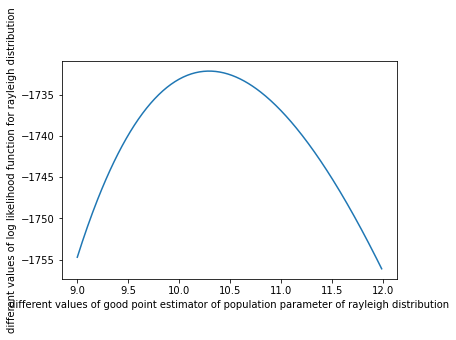

In [48]:
plt.plot(theta_1_hat,log_e_l)
plt.xlabel('different values of good point estimator of population parameter of rayleigh distribution')
plt.ylabel('different values of log likelihood function for rayleigh distribution')

In [49]:
max(log_e_l)

-1732.1511439245887

In [57]:
sample=np.random.rayleigh(scale=6.5,size=5000000)

(array([8.6000e+01, 2.4100e+02, 3.6300e+02, 4.7500e+02, 6.6700e+02,
        8.1100e+02, 9.6100e+02, 1.0760e+03, 1.2820e+03, 1.3320e+03,
        1.5700e+03, 1.7200e+03, 1.8490e+03, 1.8820e+03, 2.0700e+03,
        2.2150e+03, 2.3830e+03, 2.5450e+03, 2.5630e+03, 2.7700e+03,
        2.8670e+03, 3.0220e+03, 3.2820e+03, 3.3960e+03, 3.4590e+03,
        3.6170e+03, 3.6870e+03, 3.8430e+03, 4.0290e+03, 4.0350e+03,
        4.3120e+03, 4.5640e+03, 4.6080e+03, 4.6760e+03, 4.9800e+03,
        5.0520e+03, 5.2940e+03, 5.2780e+03, 5.3520e+03, 5.6280e+03,
        5.5580e+03, 5.7670e+03, 6.0920e+03, 5.9640e+03, 6.3140e+03,
        6.3610e+03, 6.3710e+03, 6.6410e+03, 6.8060e+03, 6.8510e+03,
        7.0250e+03, 7.1160e+03, 7.2310e+03, 7.2350e+03, 7.5280e+03,
        7.5320e+03, 7.7230e+03, 7.9340e+03, 8.0100e+03, 8.0800e+03,
        8.1560e+03, 8.4350e+03, 8.5260e+03, 8.5230e+03, 8.8470e+03,
        8.8740e+03, 9.0300e+03, 9.0560e+03, 9.0430e+03, 9.3280e+03,
        9.5080e+03, 9.4190e+03, 9.5010e+03, 9.93

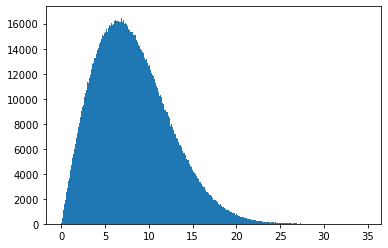

In [60]:
plt.hist(sample,bins=1000)

In [61]:
samples=np.random.rayleigh(scale=6.5,size=(500,2))

In [62]:
mvue_values=np.sqrt(np.mean(samples**2,axis=1)/2)

(array([ 24.,  52.,  87., 126.,  98.,  62.,  37.,   6.,   5.,   3.]),
 array([ 1.43308359,  2.68206705,  3.93105052,  5.18003398,  6.42901745,
         7.67800091,  8.92698438, 10.17596785, 11.42495131, 12.67393478,
        13.92291824]),
 <BarContainer object of 10 artists>)

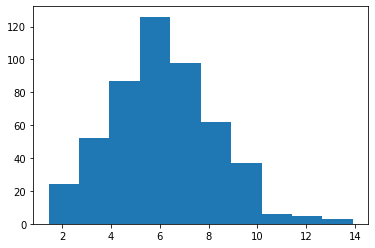

In [63]:
plt.hist(mvue_values)

In [64]:
np.mean(mvue_values)

6.1225661638544535

In [65]:
np.var(mvue_values)

4.596941864215388

In [66]:
samples=np.random.rayleigh(scale=6.5,size=(500,10))

In [67]:
mvue_values=np.sqrt(np.mean(samples**2,axis=1)/2)

In [68]:
mvue_values

array([ 5.61182353,  6.92011245,  6.85415997,  6.97534076,  7.24460265,
        6.51055349,  4.89447904,  6.40116215,  5.73507649,  5.16074813,
        5.50422972,  6.67181669,  6.28225974,  5.5250912 ,  4.69258286,
        5.87014945,  5.56018345,  6.75938724,  6.58661253,  5.59134731,
        6.64822258,  4.64378149,  7.31241935,  8.24301791,  7.59969334,
        7.46730102,  5.97420726,  5.86557048,  6.31326945,  4.70046389,
        6.41402518,  6.73117862,  5.06518535,  7.46367421,  6.95451493,
        4.49551849,  5.69097367,  7.19591253,  7.15094838,  5.29039888,
        6.7245646 ,  6.19665508,  4.99177457,  6.78794254,  5.31070677,
        7.47331261,  6.67535374,  4.86653444,  6.28613313,  7.13835206,
        6.28185325,  4.87671989,  5.02205106,  4.51553569,  7.68434998,
        7.16372772,  5.92674485,  6.18611719,  8.16413508,  6.09872969,
        5.07726367,  5.99377366,  4.86741471,  6.83268407,  6.3946582 ,
        7.66413923,  7.76953063,  6.16795262,  6.3936622 ,  6.77

(array([  5.,  37.,  94., 126., 115.,  85.,  29.,   6.,   2.,   1.]),
 array([ 3.59127996,  4.28534071,  4.97940145,  5.6734622 ,  6.36752294,
         7.06158369,  7.75564444,  8.44970518,  9.14376593,  9.83782668,
        10.53188742]),
 <BarContainer object of 10 artists>)

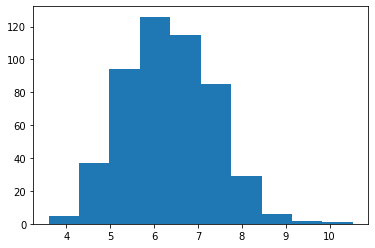

In [69]:
plt.hist(mvue_values)

In [70]:
best_estimate=np.mean(mvue_values)

In [71]:
best_estimate

6.336851025370126

In [72]:
np.var(mvue_values)

1.0139100970838888